Run first the [setup notebook](./00-setup.ipynb)

# Embeddings

In [33]:
from gensim.models import Word2Vec, FastText
import gensim.downloader
from nltk.corpus import movie_reviews
from pprint import pprint
import numpy as np

In [28]:
def explore_word(word_vectors, word, analogy_positive=None, analogy_negative=None, odd_one_out=None):
    """
    Nicely prints information about a word from a word embedding model.
    
    Parameters:
    - word_vectors: gensim KeyedVectors object
    - word: str, the word to explore
    - analogy_positive: list of words for analogy (positive)
    - analogy_negative: list of words for analogy (negative)
    - odd_one_out: list of words to find the odd one out
    """
    def format_vector(vec):
        return np.round(vec, 3)
    
    print(f"Vector for '{word}':")
    print(format_vector(word_vectors[word]))
    print("\nMost similar words to '{0}':".format(word))
    pprint(word_vectors.most_similar(word)[:5])
    print("\n")
    
    if analogy_positive and analogy_negative:
        print(f"Analogy: {analogy_positive} - {analogy_negative}")
        result = word_vectors.most_similar(positive=analogy_positive, negative=analogy_negative)[:5]
        pprint(result)
        print("\n")
    
    if odd_one_out:
        print(f"Odd one out in {odd_one_out}:")
        print(word_vectors.doesnt_match(odd_one_out))
        print("\n")

## Loading movie reviews and create sentences

In [29]:
# get sentences from collection
sentences = movie_reviews.sents()
print(f'#sentences: {len(sentences)}')
for i in range(5):
    print(f"    tokens: {sentences[i]}")

#sentences: 71532
    tokens: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.']
    tokens: ['they', 'get', 'into', 'an', 'accident', '.']
    tokens: ['one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.']
    tokens: ['what', "'", 's', 'the', 'deal', '?']
    tokens: ['watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.']


## Train a Word2Vec model

In [30]:

# train model with window 5, 25 dimensions
word_vectors = Word2Vec(sentences, vector_size=25, window=5).wv

explore_word(
    word_vectors, 
    word='cat', 
    analogy_positive=['paris','germany'], 
    analogy_negative=['france'], 
    odd_one_out=["bird", "dog", "cat", "town"]
)

Vector for 'cat':
[ 0.033  0.147  0.844 -0.409 -0.28  -0.301  0.328  0.831 -0.681 -0.517
 -0.346 -0.121  0.43  -0.008 -0.134  0.153  0.477  0.341 -0.747  0.043
 -0.225  0.955  0.048  0.373  0.556]

Most similar words to 'cat':
[('jeep', 0.9223941564559937),
 ('horse', 0.9074856638908386),
 ('belt', 0.9059987664222717),
 ('blonde', 0.9044825434684753),
 ('heroine', 0.9026617407798767)]


Analogy: ['paris', 'germany'] - ['france']
[('hooker', 0.9558333158493042),
 ('lab', 0.9556167721748352),
 ('upstairs', 0.953702449798584),
 ('plumbing', 0.9506282210350037),
 ('striptease', 0.9499393105506897)]


Odd one out in ['bird', 'dog', 'cat', 'town']:
town




## Train a FastText model

In [36]:
model = FastText(vector_size=25, window=5, min_count=1)  # instantiate
model.build_vocab(corpus_iterable=sentences)
model.train(corpus_iterable=sentences, total_examples=len(sentences), epochs=10)
word_vectors = model.wv

explore_word(
    word_vectors, 
    word='cat', 
    analogy_positive=['paris','germany'], 
    analogy_negative=['france'], 
    odd_one_out=["bird", "dog", "cat", "town"]
)

Vector for 'cat':
[ 9.500e-01  2.466e+00  6.640e-01  3.506e+00 -6.450e-01  2.144e+00
  1.806e+00 -1.785e+00  2.470e+00  1.965e+00 -2.000e-03  4.119e+00
 -1.080e+00 -9.080e-01 -5.270e-01 -3.474e+00 -2.655e+00 -3.113e+00
 -1.031e+00  2.699e+00  1.540e-01  1.101e+00 -4.484e+00  2.438e+00
  3.860e-01]

Most similar words to 'cat':
[('caveat', 0.9445561766624451),
 ('carat', 0.9350780248641968),
 ('catsuit', 0.9158630967140198),
 ('neck', 0.9145280718803406),
 ('peat', 0.9129927158355713)]


Analogy: ['paris', 'germany'] - ['france']
[('thorny', 0.8497904539108276),
 ('brittany', 0.8449139595031738),
 ('suplee', 0.8401258587837219),
 ('teeny', 0.8389491438865662),
 ('thora', 0.8376181721687317)]


Odd one out in ['bird', 'dog', 'cat', 'town']:
town




## Let's use a pretrained model over wikipedia with much more context

In [39]:
# Show all available models in gensim-data
pprint(list(gensim.downloader.info()['models'].keys()))

# load a pre-trained glove model
word_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']


In [40]:
def print_similar(term):
    print(f"{term:>10}: {', '.join([e[0] for e in word_vectors.most_similar(term) if e[1] > 0.7])}")
    print(f"{'':>10}  {', '.join([str(e) for e in word_vectors.get_vector(term)][:7])}, ...")
    print()

def print_analogy(positive, negative):
    left_side = " + ".join(positive) + " - " + " - ".join(negative)
    right_side = ', '.join([e[0] for e in word_vectors.most_similar(positive=positive, negative=negative) if e[1] > 0.1])
    print(f"{left_side:>30} = {right_side}")

def print_doesnt_match(list_of_terms):
    if not list_of_terms is list:
        list_of_terms = list_of_terms.split()
    word = word_vectors.doesnt_match(list_of_terms)
    list_of_terms.remove(word)
    print("{:>10} not in {}".format(word, str(list_of_terms)))

for t in ['woman','movie','cats','nice','vacation']:
    print_similar(t)
print()

print_analogy(['actor','woman'], ['man'])
print_analogy(['paris','germany'], ['france'])
print()

print_doesnt_match("breakfast cereal dinner lunch")
print_doesnt_match("bird dog cat town")
print_doesnt_match("paris berlin frankfurt singapore")
print_doesnt_match("man woman child boy girl")
print_doesnt_match("john peter fred anna")


     woman: girl, man, mother, boy, she, child, wife, her, herself, daughter
            0.59368, 0.44825, 0.5932, 0.074134, 0.11141, 1.2793, 0.16656, ...

     movie: film, movies, films, hollywood, comedy, drama, sequel, starring, remake, shows
            0.38251, 0.14821, 0.60601, -0.51533, 0.43992, 0.061053, -0.62716, ...

      cats: dogs, rabbits, animals, pets, cat, rats
            0.26975, 0.33231, 0.94334, -0.94747, -0.68657, 0.9018, 0.18571, ...

      nice: good, happy, perfect, pretty, wonderful
            -0.18554, 0.047152, 0.34867, -0.23114, -0.26083, 0.63108, 0.55687, ...

  vacation: vacations, honeymoon, trips, trip, holiday
            -0.37181, -0.29097, 0.34538, 0.063625, -0.37472, -0.072595, -0.06624, ...


           actor + woman - man = actress, comedian, actresses, screenwriter, starred, starring, actors, dancer, singer, filmmaker
      paris + germany - france = berlin, frankfurt, vienna, munich, hamburg, bonn, prague, cologne, zurich, leipzig

    cereal 

## Let's visualize the embeddings of selected words in a 2D figure

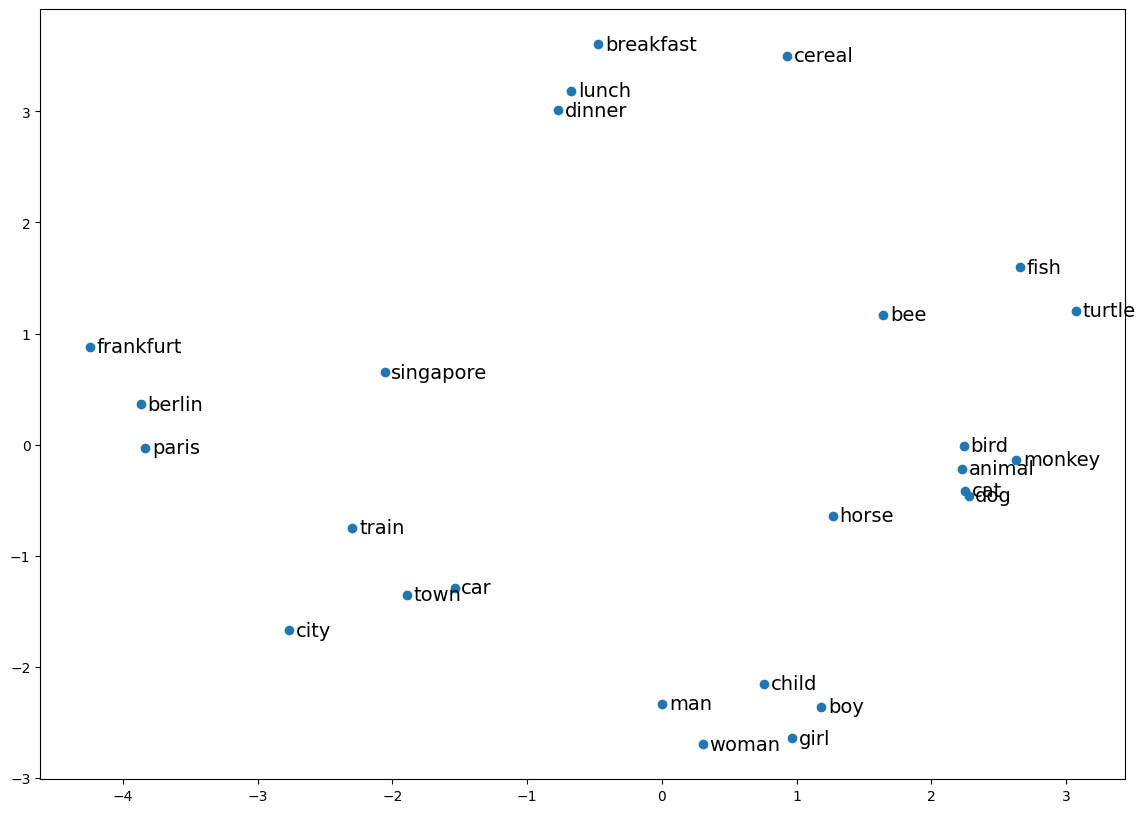

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gensim.downloader

# get vectors for terms
words = "animal bird dog cat horse fish bee monkey turtle car town train city paris berlin frankfurt singapore man woman child boy girl breakfast cereal dinner lunch".split()
vectors = word_vectors[words]

# apply a PCA to map to 2 dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# create a scatter plot of the projection
plt.figure(figsize=(14,10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0]+0.05, result[i, 1]-0.05), fontsize=14)
plt.show()

---